In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,accuracy_score 

In [2]:
car_data = pd.read_csv("ford.csv")

In [3]:
car_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
car_data.shape

(17966, 9)

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [6]:
car_data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
car_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [8]:
# checking hte distribution of categorical dataa
print(car_data.fuelType.value_counts())
print(car_data.fuelType.unique())

fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64
['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']


In [9]:
print(car_data.transmission.value_counts())
print(car_data.transmission.unique())

transmission
Manual       15518
Automatic     1361
Semi-Auto     1087
Name: count, dtype: int64
['Automatic' 'Manual' 'Semi-Auto']


In [10]:
print(car_data.model.value_counts())
print(car_data.model.unique())

model
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64
[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Range

In [11]:
# splitting numerical and catagorical 
categorical_columns = ["model", "transmission", "fuelType"]
numerical_columns = ["year", "mileage", "tax", "mpg", "engineSize"]

# Encoding

In [12]:
# Enocoding
ohe = OneHotEncoder(sparse_output=False, drop="first")
encoded_array = ohe.fit_transform(car_data[categorical_columns])

# convert to the datafram 
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(categorical_columns))

# merge data to the original 
car_data = pd.concat([car_data, encoded_df], axis=1).drop(columns=categorical_columns)


# save Encoded model

In [35]:
import joblib
joblib.dump(ohe, "encoder.joblib")

['encoder.joblib']

In [38]:
import joblib

# Load encoder
encoder = joblib.load("encoder.joblib")

# Print categories
print("Model categories:", encoder.categories_[0])
print("Transmission categories:", encoder.categories_[1])
print("Fuel Type categories:", encoder.categories_[2])

Model categories: [' B-MAX' ' C-MAX' ' EcoSport' ' Edge' ' Escort' ' Fiesta' ' Focus'
 ' Fusion' ' Galaxy' ' Grand C-MAX' ' Grand Tourneo Connect' ' KA' ' Ka+'
 ' Kuga' ' Mondeo' ' Mustang' ' Puma' ' Ranger' ' S-MAX' ' Streetka'
 ' Tourneo Connect' ' Tourneo Custom' ' Transit Tourneo' 'Focus']
Transmission categories: ['Automatic' 'Manual' 'Semi-Auto']
Fuel Type categories: ['Diesel' 'Electric' 'Hybrid' 'Other' 'Petrol']


In [13]:
# splitiing 
y = car_data["price"]
x = car_data.drop(columns=["price"], errors="ignore")

In [14]:
print(car_data.columns)

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ C-MAX',
       'model_ EcoSport', 'model_ Edge', 'model_ Escort', 'model_ Fiesta',
       'model_ Focus', 'model_ Fusion', 'model_ Galaxy', 'model_ Grand C-MAX',
       'model_ Grand Tourneo Connect', 'model_ KA', 'model_ Ka+',
       'model_ Kuga', 'model_ Mondeo', 'model_ Mustang', 'model_ Puma',
       'model_ Ranger', 'model_ S-MAX', 'model_ Streetka',
       'model_ Tourneo Connect', 'model_ Tourneo Custom',
       'model_ Transit Tourneo', 'model_Focus', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Electric', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')


In [15]:
print(car_data.head())  # Check if "price" exists

   year  price  mileage  tax   mpg  engineSize  model_ C-MAX  model_ EcoSport  \
0  2017  12000    15944  150  57.7         1.0           0.0              0.0   
1  2018  14000     9083  150  57.7         1.0           0.0              0.0   
2  2017  13000    12456  150  57.7         1.0           0.0              0.0   
3  2019  17500    10460  145  40.3         1.5           0.0              0.0   
4  2019  16500     1482  145  48.7         1.0           0.0              0.0   

   model_ Edge  model_ Escort  ...  model_ Tourneo Connect  \
0          0.0            0.0  ...                     0.0   
1          0.0            0.0  ...                     0.0   
2          0.0            0.0  ...                     0.0   
3          0.0            0.0  ...                     0.0   
4          0.0            0.0  ...                     0.0   

   model_ Tourneo Custom  model_ Transit Tourneo  model_Focus  \
0                    0.0                     0.0          0.0   
1         

In [16]:
car_data.head()

,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2018,14000,9083,150,57.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2017,13000,12456,150,57.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2019,17500,10460,145,40.3,1.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2019,16500,1482,145,48.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
#  train test splitting 
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# linear Regression MOdel 

In [18]:
lin_reg = LinearRegression()

In [19]:
lin_reg.fit(x_train, y_train)

LinearRegression()

# model evaluation

In [20]:
# tarinig data prediction 
train_data_pred = lin_reg.predict(x_train)
train_data_accuracy = r2_score(train_data_pred, y_train)

In [21]:
print("Accracy of train data : ",train_data_accuracy)

Accracy of train data :  0.8124615110726525


In [22]:
# R square error  
error_score = r2_score(train_data_pred, y_train)
print("R squared Error : ", error_score*100)

R squared Error :  81.24615110726525


# Actual visualization 

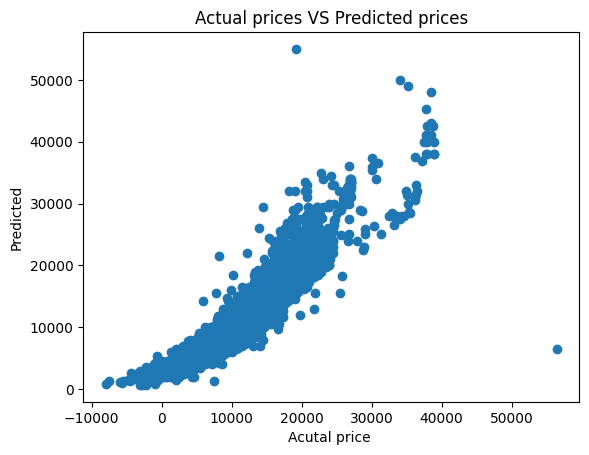

In [23]:
plt.scatter(train_data_pred, y_train)
plt.xlabel("Acutal price ")
plt.ylabel("Predicted")
plt.title("Actual prices VS Predicted prices")
plt.show()

In [24]:
# test data accuracyabs 
test_data_pred = lin_reg.predict(x_test)

In [25]:
# R square error
test_error_score = r2_score(test_data_pred, y_test)
print("R squared Error : ", test_error_score*100)

R squared Error :  82.2268790545284


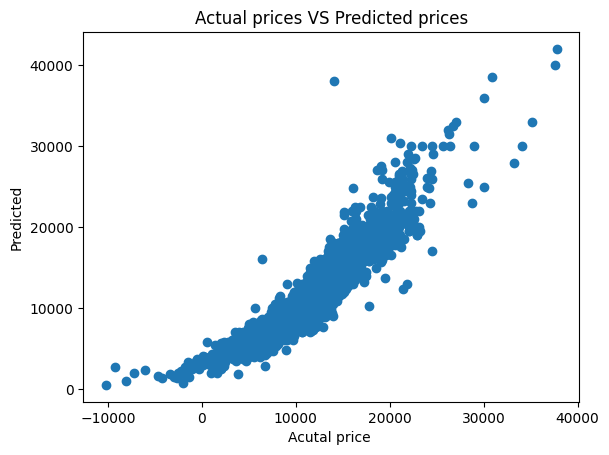

In [26]:
plt.scatter(test_data_pred, y_test)
plt.xlabel("Acutal price ")
plt.ylabel("Predicted")
plt.title("Actual prices VS Predicted prices")
plt.show()

# Save MOdel 

In [27]:
import joblib
filname = "Linear car price prediction.joblib"
joblib.dump(lin_reg, filname)

['Linear car price prediction.joblib']

# Lasso Regesssion

In [28]:
la_reg = Lasso()

In [29]:
la_reg.fit(x_train, y_train)

Lasso()

In [30]:
# tarinig data prediction
lasso_train_data_pred = la_reg.predict(x_train)
lasso_train_data_accuracy = r2_score(train_data_pred, y_train)

print("R square Eror : ", lasso_train_data_accuracy* 100)

R square Eror :  81.24615110726525


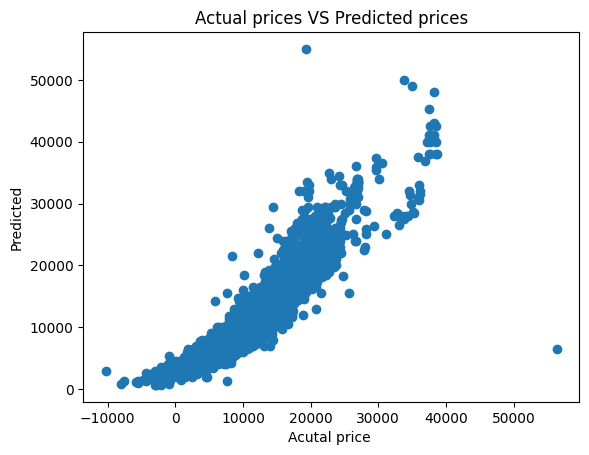

In [31]:
plt.scatter(lasso_train_data_pred, y_train)
plt.xlabel("Acutal price ")
plt.ylabel("Predicted")
plt.title("Actual prices VS Predicted prices")
plt.show()

In [32]:
#  testing data prediction
lasso_test_data_pred = la_reg.predict(x_test)
lasso_test_data_accuracy = r2_score(lasso_test_data_pred, y_test)
print("R square Eror : ", lasso_test_data_accuracy* 100)

R square Eror :  81.9345430185049


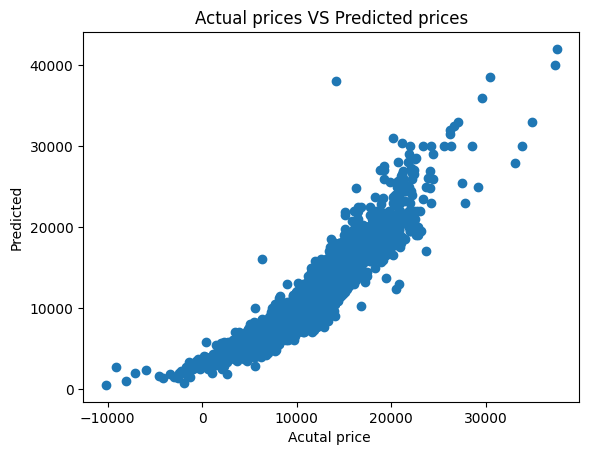

In [33]:
plt.scatter(lasso_test_data_pred, y_test)
plt.xlabel("Acutal price ")
plt.ylabel("Predicted")
plt.title("Actual prices VS Predicted prices")
plt.show()

In [36]:
import joblib

joblib.dump(la_reg, "lasso car price predictio.joblib")

['lasso car price predictio.joblib']